## K-Means Clustering with sklearn in Python

### By Thomas Oswald

#### Spring 2020, Data 4319

K-Means clustering is a unsupervised learning algorithm that can partition observations into clusters. These clusters are identified with the nearest mean to the centroid of each cluster.  In this notebook, we will use sklearn modules to implement classifications on the Iris dataset and produce a probability dataframe of the classifications.

In [1]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(0)

#### Preview of the IRIS data set

In [2]:
data = pd.read_csv('iris_data.csv')
data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# create subset
data = data.drop(['SepalWidth'], axis = 1)
data.head()

,SepalLength,PetalLength,PetalWidth,Species
0,5.1,1.4,0.2,setosa
1,4.9,1.4,0.2,setosa
2,4.7,1.3,0.2,setosa
3,4.6,1.5,0.2,setosa
4,5.0,1.4,0.2,setosa


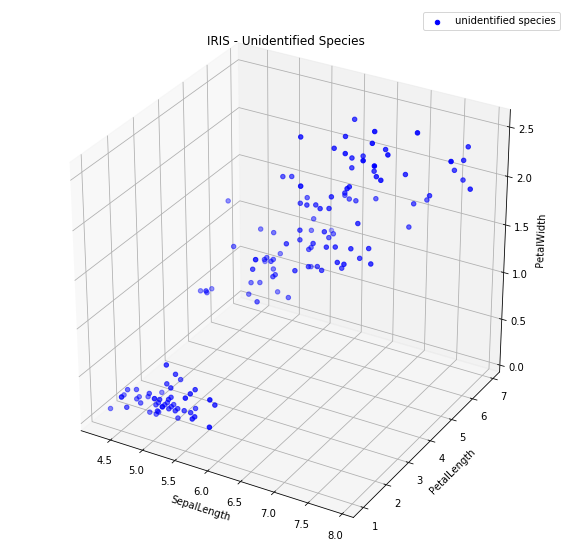

In [4]:
# subset just for plotting
plt_data = data.iloc[:,0:4].values

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(np.asarray(plt_data[0:len(data),0], np.float),
           np.asarray(plt_data[0:len(data),1], np.float),
           np.asarray(plt_data[0:len(data),2], np.float),
           c = 'blue',
           label = "unidentified species")

plt.title('IRIS - Unidentified Species')
ax.set_xlabel('SepalLength')
ax.set_ylabel('PetalLength')
ax.set_zlabel('PetalWidth')
ax.legend()

In [5]:
K_Means = KMeans(n_clusters=3)
K_Means

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [6]:
# the predicted values for each cluster
k_means_ID = K_Means.fit_predict(data[['SepalLength','PetalLength','PetalWidth']])
k_means_ID

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

### The centroids of each cluster

In [7]:
K_Means.cluster_centers_

array([[5.006     , 1.462     , 0.246     ],
       [5.9016129 , 4.39354839, 1.43387097],
       [6.85      , 5.74210526, 2.07105263]])

In [8]:
# append predicted values to DataFrame
data['K_Means_ID'] = k_means_ID
data.head()

,SepalLength,PetalLength,PetalWidth,Species,K_Means_ID
0,5.1,1.4,0.2,setosa,0
1,4.9,1.4,0.2,setosa,0
2,4.7,1.3,0.2,setosa,0
3,4.6,1.5,0.2,setosa,0
4,5.0,1.4,0.2,setosa,0


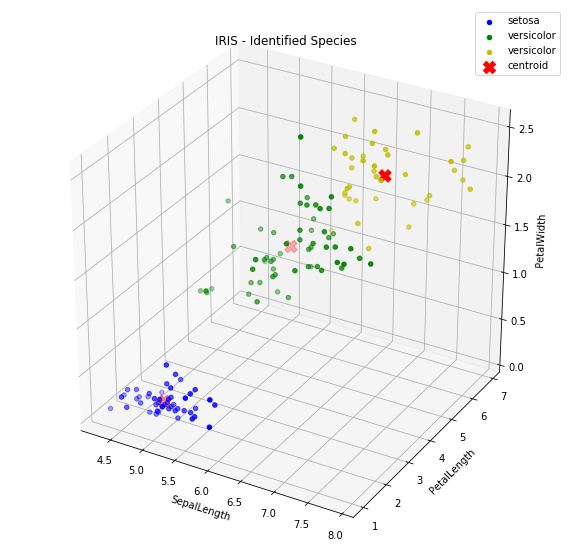

In [9]:
# creating a subset FataFrame of the K-Means predicted values for each species
df1 = data[data.K_Means_ID==0]
df2 = data[data.K_Means_ID==1]
df3 = data[data.K_Means_ID==2]

# convert so that 3 dimension ploting can continue
plt_df1 = df1.iloc[:,0:5].values
plt_df2 = df2.iloc[:,0:5].values
plt_df3 = df3.iloc[:,0:5].values

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# plot each cluster
ax.scatter(np.asarray(plt_df1[0:len(df1),0], np.float),
           np.asarray(plt_df1[0:len(df1),1], np.float),
           np.asarray(plt_df1[0:len(df1),2], np.float),
           c = 'blue',
           label = "setosa")

ax.scatter(np.asarray(plt_df2[0:len(df2),0], np.float),
           np.asarray(plt_df2[0:len(df2),1], np.float),
           np.asarray(plt_df2[0:len(df2),2], np.float),
           c = 'green',
           label = "versicolor")

ax.scatter(np.asarray(plt_df3[0:len(df3),0], np.float),
           np.asarray(plt_df3[0:len(df3),1], np.float),
           np.asarray(plt_df3[0:len(df3),2], np.float),
           c = 'y',
           label = "versicolor")

# plot the centoids
ax.scatter(K_Means.cluster_centers_[:,0],
           K_Means.cluster_centers_[:,1],
           K_Means.cluster_centers_[:,2],
           color = 'red',
           marker = 'X',
           s = 150,
           label = "centroid")


plt.title('IRIS - Identified Species')
ax.set_xlabel('SepalLength')
ax.set_ylabel('PetalLength')
ax.set_zlabel('PetalWidth')
ax.legend()

We have been able to successfully identify the 3 clusters but we need to investgate the probaility for each species to be classified correctly.

### Calculate Probability

In [10]:
# make cluster Datafarmes into a list of numpy arrays
df1 = df1.values
df2 = df2.values
df3 = df3.values

In [11]:
setosa_count = 0
versicolor_count = 0 
virginica_count = 0

for i in range(len(df1)):
    if df1[i][3] == 'setosa' and df1[i][4] == 0:
        setosa_count += 1/len(df1)

for i in range(len(df2)):
    if df2[i][3] == 'versicolor' and df2[i][4] == 1:
        versicolor_count += 1/len(df2)
        
for i in range(len(df3)):
    if df3[i][3] == 'virginica' and df3[i][4] == 2:
        virginica_count += 1/len(df3)

results = pd.DataFrame([[setosa_count,
                         versicolor_count,
                         virginica_count]],
                       columns = ['Setosa Probability','Versicolor Probability','Virginica Probability'])
results

,Setosa Probability,Versicolor Probability,Virginica Probability
0,1.0,0.774194,0.947368


Therefore, after utilizing the sklearn learn library and using 'KMeans' with 3 clusters, we were able to return a classification with a 100% probability of classifying the Setosa Species, 77.4% probability of classifying the Versicolor specices and a 94.7% probability of classifying the virginica. The low probability of the versicolor species is more than likely due to the close proximity of the Virginica species cluster.